In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go

In [500]:
# Import neighborhood data
neighborhood_data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/old_datasets/old_dataset.csv')
neighborhoods = neighborhood_data.iloc[:, 1:4]
ll  = neighborhood_data.iloc[:, 1:6]
neighborhoods.head()

,id,borough,neighborhood
0,nyu_2451_34572.1,Bronx,Wakefield
1,nyu_2451_34572.2,Bronx,Co-op City
2,nyu_2451_34572.3,Bronx,Eastchester
3,nyu_2451_34572.4,Bronx,Fieldston
4,nyu_2451_34572.5,Bronx,Riverdale


In [501]:
# features_sorted_save = neighborhoods.to_csv('neighborhoods.csv', index=False)

In [467]:
# Import venue data within 1km of each neighborhood
features_data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/data/all_features_counts_V3.csv')
features_data = features_data.iloc[:, 2:]
features_data.head()

,id,lodging,restaurant,school,health,bar,church,bank,store,clothing,...,pharmacy,farmersmarket,foodtours,bowling,syrian,southafrican,eventservices,bookstores,homedecor,diyfood
0,nyu_2451_34572.1,9,55,26,13,10,60,12,36,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,nyu_2451_34572.2,5,39,26,7,4,25,15,37,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nyu_2451_34572.3,3,33,16,3,11,23,4,36,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nyu_2451_34572.4,2,54,27,7,14,5,24,19,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,nyu_2451_34572.5,3,20,25,9,16,12,23,19,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [468]:
# Check for missing data
total = features_data.isnull().sum().sort_values(ascending=False)
percent = (features_data.isnull().sum()/features_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
id,0,0.0
ukrainian,0,0.0
dimsum,0,0.0
uzbek,0,0.0
taiwanese,0,0.0


In [469]:
# Create function to find the most common venues per neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [470]:
# Create new dataframe for most common venues
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['id']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
features_sorted = pd.DataFrame(columns=columns)
features_sorted['id'] = features_data['id']

for ind in np.arange(features_data.shape[0]):
    features_sorted.iloc[ind, 1:] = return_most_common_venues(features_data.iloc[ind, :], num_top_venues)

features_sorted.head()

,id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,nyu_2451_34572.1,church,restaurant,store,school,clothing
1,nyu_2451_34572.2,restaurant,store,clothing,school,church
2,nyu_2451_34572.3,store,restaurant,church,school,clothing
3,nyu_2451_34572.4,restaurant,school,bank,park,store
4,nyu_2451_34572.5,school,bank,restaurant,store,park


In [471]:
features_sorted

,id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,nyu_2451_34572.1,church,restaurant,store,school,clothing
1,nyu_2451_34572.2,restaurant,store,clothing,school,church
2,nyu_2451_34572.3,store,restaurant,church,school,clothing
3,nyu_2451_34572.4,restaurant,school,bank,park,store
4,nyu_2451_34572.5,school,bank,restaurant,store,park
...,...,...,...,...,...,...
301,nyu_2451_34572.302,school,bar,bank,store,clothing
302,nyu_2451_34572.303,restaurant,store,church,health,supermarket
303,nyu_2451_34572.304,store,restaurant,church,school,clothing
304,nyu_2451_34572.305,restaurant,school,store,church,lodging


In [472]:
# features_sorted_save = features_sorted.to_csv('most_common_venues.csv', index=False)

### K-Means

In [474]:
# Drop neighborhood ID to create numerical data for k-means clustering
features_clustering = pd.merge(ll, features_data, on='id')
features_clustering = features_clustering.drop(columns=['borough', 'neighborhood'])
features_clustering = features_clustering.drop('id', axis=1)
features_clustering.head()

,longitude,latitude,lodging,restaurant,school,health,bar,church,bank,store,...,pharmacy,farmersmarket,foodtours,bowling,syrian,southafrican,eventservices,bookstores,homedecor,diyfood
0,-73.847201,40.894705,9,55,26,13,10,60,12,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-73.829939,40.874294,5,39,26,7,4,25,15,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-73.827806,40.887556,3,33,16,3,11,23,4,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-73.905643,40.895437,2,54,27,7,14,5,24,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-73.912585,40.890834,3,20,25,9,16,12,23,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [476]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_clustering))
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,0.742705,0.965681,0.150000,0.916667,0.433333,0.216667,0.166667,1.000000,0.200000,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.774806,0.915060,0.083333,0.650000,0.433333,0.116667,0.066667,0.416667,0.250000,0.616667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.778772,0.947950,0.050000,0.550000,0.266667,0.050000,0.183333,0.383333,0.066667,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.634020,0.967497,0.033333,0.900000,0.450000,0.116667,0.233333,0.083333,0.400000,0.316667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.621109,0.956082,0.050000,0.333333,0.416667,0.150000,0.266667,0.200000,0.383333,0.316667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [477]:
# save_file = features_scaled.to_csv('features_minmax_scaled.csv', index=False)

In [478]:
total = features_scaled.isnull().sum().sort_values(ascending=False)
percent = (features_scaled.isnull().sum()/features_scaled.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
0,0,0.0
171,0,0.0
158,0,0.0
159,0,0.0
160,0,0.0


In [479]:
# Create elbow graph function
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

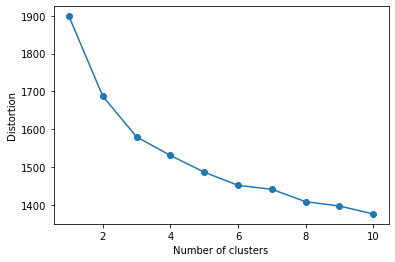

In [480]:
# Plot elbow graph
plot_distortion(features_scaled)

In [481]:
# Cluster data points using kmeans and get labels
kclusters_features = 8

kmeans_features = KMeans(n_clusters=kclusters_features, random_state=0).fit(features_clustering)

kmeans_features.labels_[0:10] 

array([4, 1, 1, 1, 1, 2, 7, 2, 2, 4], dtype=int32)

In [482]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

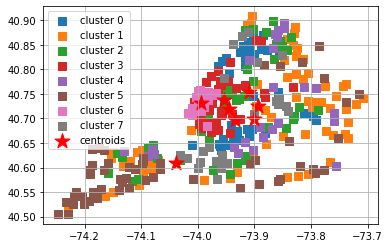

In [483]:
y_km_features = kmeans_features.fit_predict(features_clustering)
plot_clusters(np.array(features_clustering), y_km_features, plt_cluster_centers= True)

In [484]:
# Add cluster labels to venue data
features_sorted.insert(0, 'clusters', kmeans_features.labels_)
clusters = features_sorted.clusters.tolist()
features_sorted = features_sorted.drop('clusters', axis=1)

# Merge venue data with neighborhood data
all_features_data = neighborhood_data.copy()
all_features_data = pd.merge(all_features_data, features_sorted, on='id')
all_features_data['clusters'] = clusters
all_features_data.head()

,Unnamed: 0,id,borough,neighborhood,longitude,latitude,population,number_of_restaurants,average_review_count,average_restaurant_rating,average_price_level,yelp_category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,clusters
0,0,nyu_2451_34572.1,Bronx,Wakefield,-73.847201,40.894705,21242.0,13,169,4.0,1,caribbean,church,restaurant,store,school,clothing,4
1,1,nyu_2451_34572.2,Bronx,Co-op City,-73.829939,40.874294,43752.0,12,771,4.0,2,delis,restaurant,store,clothing,school,church,1
2,2,nyu_2451_34572.3,Bronx,Eastchester,-73.827806,40.887556,11506.0,19,532,4.1,1,caribbean,store,restaurant,church,school,clothing,1
3,3,nyu_2451_34572.4,Bronx,Fieldston,-73.905643,40.895437,9287.0,9,297,4.4,1,N,restaurant,school,bank,park,store,1
4,4,nyu_2451_34572.5,Bronx,Riverdale,-73.912585,40.890834,9287.0,14,319,4.0,2,burgers,school,bank,restaurant,store,park,1


In [485]:
total = all_features_data.isnull().sum().sort_values(ascending=False)
percent = (all_features_data.isnull().sum()/all_features_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Unnamed: 0,0,0.0
id,0,0.0
5th Most Common Venue,0,0.0
4th Most Common Venue,0,0.0
3rd Most Common Venue,0,0.0


### Mapping

In [486]:
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

In [487]:
# Create a map of new york

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [488]:
# Plot clusters on map of New York
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_features)
ys = [i + x + (i*x)**2 for i in range(kclusters_features)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_features_data['latitude'], all_features_data['longitude'], all_features_data['neighborhood'],all_features_data['clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Analysing Clusters

In [489]:
cluster0_features = all_features_data.loc[all_features_data['clusters'] == 0, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster1_features = all_features_data.loc[all_features_data['clusters'] == 1, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster2_features = all_features_data.loc[all_features_data['clusters'] == 2, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster3_features = all_features_data.loc[all_features_data['clusters'] == 3, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster4_features = all_features_data.loc[all_features_data['clusters'] == 4, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster5_features = all_features_data.loc[all_features_data['clusters'] == 5, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster6_features = all_features_data.loc[all_features_data['clusters'] == 6, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]
cluster7_features = all_features_data.loc[all_features_data['clusters'] == 7, all_features_data.columns[[0] + [1] + list(range(4, all_features_data.shape[1]))]]

In [499]:
.head()

SyntaxError: invalid syntax (1658820251.py, line 1)

In [491]:
print('--cluster0--')
print()
print('Top 5 most common venue type')
print(cluster0_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster0_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster0_features['borough'].value_counts()[:3])

--cluster0--

Top 5 most common venue type
restaurant    13
school        13
church         9
store          4
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
church        13
store         12
school         6
restaurant     6
clothing       2
Name: 2nd Most Common Venue, dtype: int64

Most common borough


KeyError: 'borough'

In [492]:
print('--cluster1--')
print()
print('Top 5 most common venue type')
print(cluster1_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster1_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster1_features['borough'].value_counts()[:3])

--cluster1--

Top 5 most common venue type
restaurant    45
store         16
church         3
school         2
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         37
restaurant    16
school         7
church         3
bank           2
Name: 2nd Most Common Venue, dtype: int64

Most common borough


KeyError: 'borough'

In [493]:
print('--cluster2--')
print()
print('Top 5 most common venue type')
print(cluster2_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster2_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster2_features['borough'].value_counts()[:3])

--cluster2--

Top 5 most common venue type
restaurant    38
store          6
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         31
restaurant     5
clothing       3
school         3
church         1
Name: 2nd Most Common Venue, dtype: int64

Most common borough


KeyError: 'borough'

In [494]:
print('--cluster3--')
print()
print('Top 5 most common venue type')
print(cluster3_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster3_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster3_features['borough'].value_counts()[:3])

--cluster3--

Top 5 most common venue type
school        16
restaurant    10
bar            3
store          2
church         2
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
bar         9
store       8
school      7
church      5
clothing    2
Name: 2nd Most Common Venue, dtype: int64

Most common borough


KeyError: 'borough'

In [495]:
print('--cluster4--')
print()
print('Top 5 most common venue type')
print(cluster4_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster4_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster4_features['borough'].value_counts()[:3])

--cluster4--

Top 5 most common venue type
restaurant    12
church         9
store          3
school         1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         11
church         9
restaurant     5
Name: 2nd Most Common Venue, dtype: int64

Most common borough


KeyError: 'borough'

In [496]:
print('--cluster5--')
print()
print('Top 5 most common venue type')
print(cluster5_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster5_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster5_features['borough'].value_counts()[:3])

--cluster5--

Top 5 most common venue type
restaurant    32
store         15
park           2
church         2
clothing       1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         28
restaurant    13
school         5
church         4
park           2
Name: 2nd Most Common Venue, dtype: int64

Most common borough


KeyError: 'borough'

In [497]:
print('--cluster6--')
print()
print('Top 5 most common venue type')
print(cluster6_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster6_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster6_features['borough'].value_counts()[:3])

--cluster6--

Top 5 most common venue type
school        6
lodging       5
restaurant    4
office        3
clothing      1
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
school    9
bar       5
bank      2
health    2
office    1
Name: 2nd Most Common Venue, dtype: int64

Most common borough


KeyError: 'borough'

In [498]:
print('--cluster7--')
print()
print('Top 5 most common venue type')
print(cluster7_features['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster7_features['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster7_features['borough'].value_counts()[:3])

--cluster7--

Top 5 most common venue type
restaurant    17
store          7
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         13
school         5
restaurant     3
clothing       3
Name: 2nd Most Common Venue, dtype: int64

Most common borough


KeyError: 'borough'